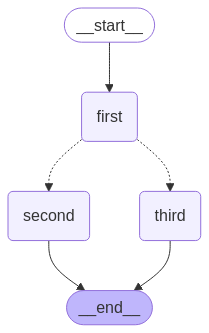

In [16]:
from typing_extensions import TypedDict
from typing import Literal

class State(TypedDict):
    graph_state:str

def first_node(state):
    return {"graph_state":state['graph_state']+"Firstnode"}

def second_node(state):
    return {"graph_state":state['graph_state']+"Second node"}

def third_node(state):
    return {"graph_state":state['graph_state']+"Third node"}

import random

def condition(state:State)->Literal['second','third']:
    graph_state=state['graph_state']
    if random.random()>0.5:
        return "second"
    else:
        return "third"


from langgraph.graph import START,END,StateGraph

builder=StateGraph(State)

builder.add_node("first",first_node)
builder.add_node("second",second_node)
builder.add_node("third",third_node)
builder.add_edge(START,"first")
builder.add_conditional_edges("first",condition)
builder.add_edge("second",END)
builder.add_edge("third",END)

from IPython.display import Image,display

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"graph_state":'Hi'})

{'graph_state': 'HiFirstnodeThird node'}

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain_groq import ChatGroq
from langgraph.graph import START,END,StateGraph



import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq()


class State(TypedDict):
    messages:Annotated[list,add_messages]

def chatbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}



